<a href="https://www.kaggle.com/code/joymago/sales-data-python-project?scriptVersionId=184016455" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("/kaggle/input/sample-sales-data/sales_data_sample.csv",encoding='latin')

# About Dataset

**The dataset provided is a sales dataset which comprises of various aspects of the sales process. It contains 25 columns, each representing different attributes related to sales transactions.**

# Data Description:
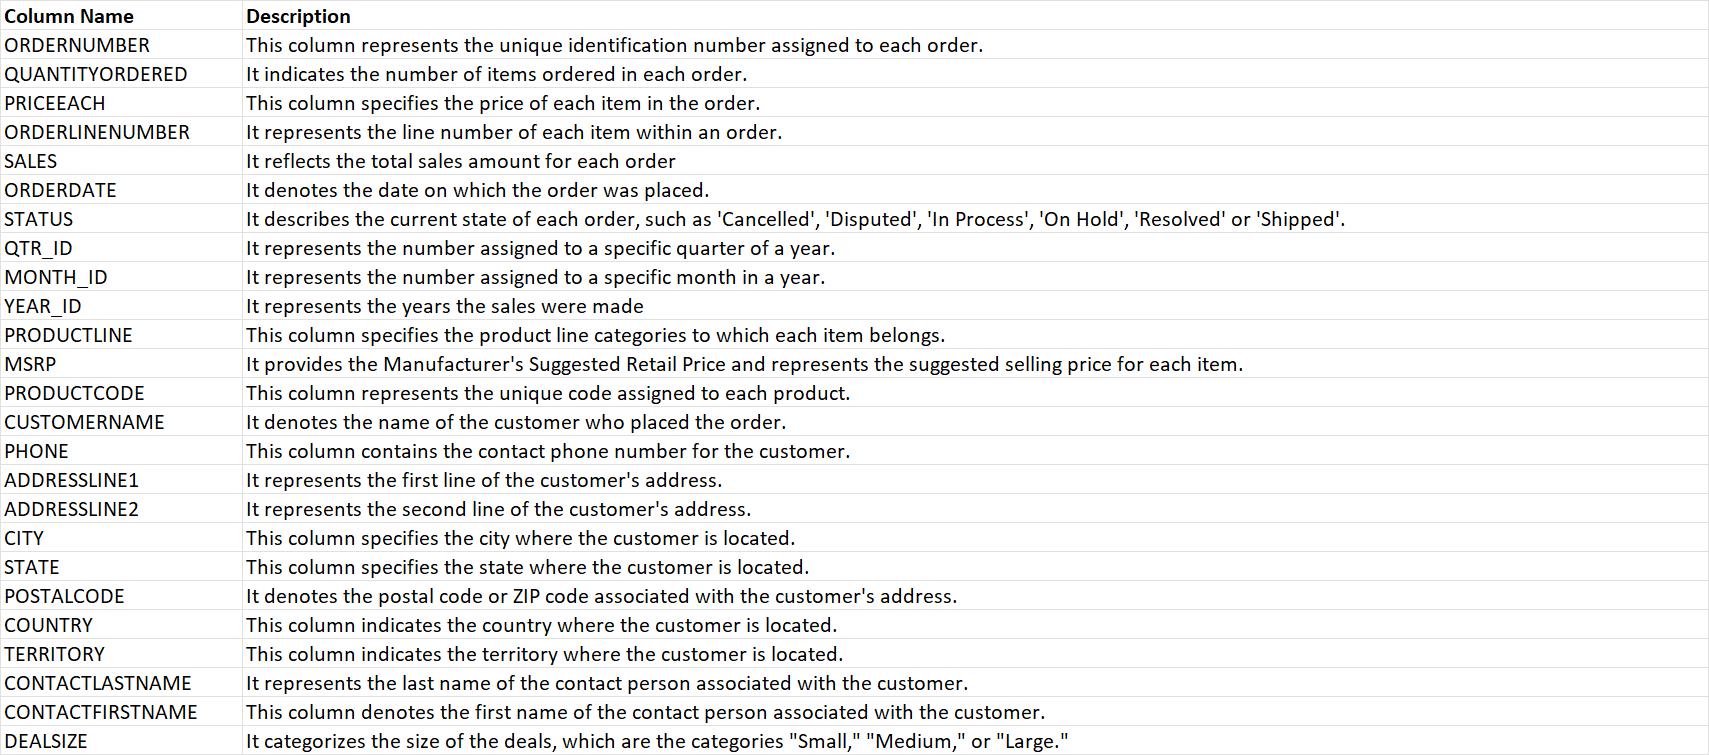

In [3]:
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [4]:
#To show and view all columns within the dataset
pd.set_option('display.max_columns', None) 
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [5]:
data.head() #Checking the first 5 rows of the data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
data.tail() #Showing last 5 rows of the data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,10414,47,65.52,9,3079.44,5/6/2005 0:00,On Hold,2,5,2005,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


**Show statistical measurements of sales dataset**

In [7]:
data.describe() #To get a quick statistical overview of the dataset

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


**Summary statistics of Quantitative variables**

In [8]:
quant_var = ['QUANTITYORDERED','PRICEEACH','SALES','MSRP']
data[quant_var].describe()

,QUANTITYORDERED,PRICEEACH,SALES,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,3553.889072,100.715551
std,9.741443,20.174277,1841.865106,40.187912
min,6.000000,26.880000,482.130000,33.000000
25%,27.000000,68.860000,2203.430000,68.000000
50%,35.000000,95.700000,3184.800000,99.000000
75%,43.000000,100.000000,4508.000000,124.000000
max,97.000000,100.000000,14082.800000,214.000000


**ANALYSIS:** 

The data shows a moderate to high variability in sales, unit prices, and MSRPs, indicating diverse product offerings and sales transactions. 

(Assumption: being that the currency is USD)

The summary statistics of the sales dataset provide valuable insights into the distribution and variability of key metrics:

**Quantity Ordered:** On average, 35 units were ordered per transaction. Orders ranged from a minimum of 6 units to a maximum of 97 units.

**Price Each:** The average price per unit was USD83.66. Prices showed some variability, with a standard deviation of USD20.17. Prices ranged from USD26.88 to USD100.00. 25% of unit prices were USD68.86 or less, 50% (median) of unit prices were USD95.70 and 75% of unit prices were USD100.00 or less.

**Sales:** The average sales amount per order was USD3,553.89. Sales amounts varied significantly, with a standard deviation of USD,841.87. Sales ranged from USD482.13 to USD14,082.80 with 25% of sales amounts being USD2,203.43 or less.

**MSRP (Manufacturer's Suggested Retail Price):** The average MSRP was USD100.72. 




In [9]:
data.shape #Showing total rows and columns

(2823, 25)

**Show all the column headers within the dataset**

In [10]:
data.columns 

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

**Checking for data types and inconsistencies**

In [11]:
data.dtypes #Showing all the data types

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

**Changing the data type of column 'ORDERDATE' from object to datetime**

In [12]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE']) 
data.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [13]:
data.info() #Showing a quick information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

# Characteristics of Data

* The dataset contains 2823 entries with 25 columns.
* All columns have non-null values except for 'ADDRESSLINE2', 'STATE', 'POSTALCODE' and 'TERRITORY'. The null-values within the 'Territory' column was handled. Since the columns 'ADDRESSLINE2', 'STATE', 'POSTALCODE' were not relevant for the EDA, these were ignored.
* Data types vary across columns, including floats, datetime, integers, and objects.

# Data Transformation

**Checking for null values in each column**

In [14]:
null_counts = data.isnull().sum() 
print(null_counts)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


**The above result shows there are null values within the columns 'ADDRESSLINE2', 'STATE', 'POSTALCODE' and 'TERRITORY'. For this analysis, not dealing with the mising values within the 'ADDRESSLINE2' and 'STATE' Variable as it may not have a significant effect on the analysis. To handle the null values in 'Territory', these will not be dropped but instead include the missing territory of the respective state.**

* Need to find the states for which the territories have not been mentioned.
* Fill the territory of the respective state into the territory column.

In [15]:
data[data['TERRITORY'].isnull()]

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
5,10168,36,96.66,1,3479.76,2003-10-28,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
8,10201,22,98.57,2,2168.54,2003-12-01,Shipped,4,12,2003,Motorcycles,95,S10_1678,Mini Wheels Co.,6505555787,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,10248,23,65.52,9,1506.96,2004-05-07,Cancelled,2,5,2004,Ships,54,S72_3212,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
2810,10261,29,50.78,7,1472.62,2004-06-17,Shipped,2,6,2004,Ships,54,S72_3212,Quebec Home Shopping Network,(514) 555-8054,43 rue St. Laurent,NaN,Montreal,Quebec,H1J 1C3,Canada,NaN,Fresnisre,Jean,Small
2812,10283,33,51.32,12,1693.56,2004-08-20,Shipped,3,8,2004,Ships,54,S72_3212,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,NaN,Lincoln,Elizabeth,Small
2817,10337,42,97.16,5,4080.72,2004-11-21,Shipped,4,11,2004,Ships,54,S72_3212,Classic Legends Inc.,2125558493,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,NaN,Hernandez,Maria,Medium


****From above data, it shows that the territory has not been specified for USA and Canada. ****

In [16]:
#Assigning "NAMER" (North America) to all null values within the Territory column
data['TERRITORY'] = data['TERRITORY'].fillna('NAMER') 
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NAMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NAMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NAMER,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [17]:
data.TERRITORY.unique()

array(['NAMER', 'EMEA', 'APAC', 'Japan'], dtype=object)

In [18]:
#Assigning "APAC" to all values with "Japan" within the Territory column as Japan is not a territory
data['TERRITORY'] = data['TERRITORY'].replace('Japan', 'APAC')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NAMER,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NAMER,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NAMER,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [19]:
data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

**Checking for duplicates**

In [20]:
duplicates=data.duplicated()  
print(duplicates.sum())

0


**Checking for the total number of orders by territory**

In [21]:
data['TERRITORY'].value_counts() 

TERRITORY
EMEA     1407
NAMER    1074
APAC      342
Name: count, dtype: int64

**Checking the time range of the data**

In [22]:
data.groupby(['YEAR_ID'])['MONTH_ID'].nunique() 

YEAR_ID
2003    12
2004    12
2005     5
Name: MONTH_ID, dtype: int64

**The data for 2005 is incomplete as its only for 5 months**

# Data Visualization

In [23]:
pivot_table_prod = pd.pivot_table(
    data=data,
    values='SALES',
    index='PRODUCTLINE',
    columns= ['YEAR_ID'],
    aggfunc='sum'
)
pivot_table_prod

YEAR_ID,2003,2004,2005
PRODUCTLINE,,,
Classic Cars,1484785.29,1762257.09,672573.28
Motorcycles,370895.58,560545.23,234947.53
Planes,272257.60,502671.80,200074.17
Ships,244821.09,341437.97,128178.07
Trains,72802.29,116523.85,36917.33
Trucks and Buses,420429.93,529302.89,178057.02
Vintage Cars,650987.76,911423.77,340739.31


In [24]:
pivot_table_dealsize = pd.pivot_table(
    data=data,
    values='SALES',
    index='TERRITORY',
    columns= ['DEALSIZE'],
    aggfunc='sum'
)
pivot_table_dealsize

DEALSIZE,Large,Medium,Small
TERRITORY,,,
APAC,128569.37,723321.00,349404.68
EMEA,636782.62,3018318.60,1324171.19
NAMER,536767.27,2345792.64,969501.48


In [25]:
df_2003= data[data['YEAR_ID']==2003]
pivot_2003 = pd.pivot_table(
    data=df_2003,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)
pivot_2003


TERRITORY,APAC,EMEA,NAMER
MONTH_ID,,,
1,NaN,110756.30,18997.30
2,NaN,115052.43,25783.76
3,55245.02,60766.92,58492.96
4,94055.13,82777.01,24777.41
5,9738.18,149087.31,33847.62
6,NaN,71992.11,96090.45
7,28397.26,58022.28,101312.34
8,NaN,33206.63,164602.67
9,102051.41,85229.40,76692.55


In [26]:
df_2004= data[data['YEAR_ID']==2004]
pivot_2004 = pd.pivot_table(
    data=df_2004,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)
pivot_2004

TERRITORY,APAC,EMEA,NAMER
MONTH_ID,,,
1,50490.64,204347.38,61739.40
2,73857.16,133954.66,103607.71
3,NaN,126306.14,79427.59
4,17114.43,116811.83,72221.86
5,NaN,100267.19,173171.20
6,71717.47,110585.25,104371.50
7,53631.96,166878.31,106633.82
8,3127.88,181664.61,276708.78
9,42902.84,210361.71,67486.36


In [27]:
df_2005= data[data['YEAR_ID']==2005]
pivot_2005 = pd.pivot_table(
    data=df_2005,
    values='SALES',
    index='MONTH_ID',
    columns='TERRITORY',
    aggfunc='sum'
)
pivot_2005

TERRITORY,APAC,EMEA,NAMER
MONTH_ID,,,
1,68043.56,119374.49,152125.37
2,21730.03,217425.83,119030.32
3,39335.85,204041.18,130885.73
4,3141.53,116562.83,141928.93
5,58349.52,272424.66,127086.88


# 1. Using Seaborn and Matplotlib to create a line plot visualizing sales data over time.

In [28]:
# Extract the year and month from 'ORDERDATE'
data['YearMonth'] = data['ORDERDATE'].dt.to_period('M')

# Aggregate the data by month and sum the sales, converting to millions
monthly_sales = data.groupby('YearMonth')['SALES'].sum().reset_index()
monthly_sales['SALES'] = monthly_sales['SALES'] / 1_000_000  # Convert to millions
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


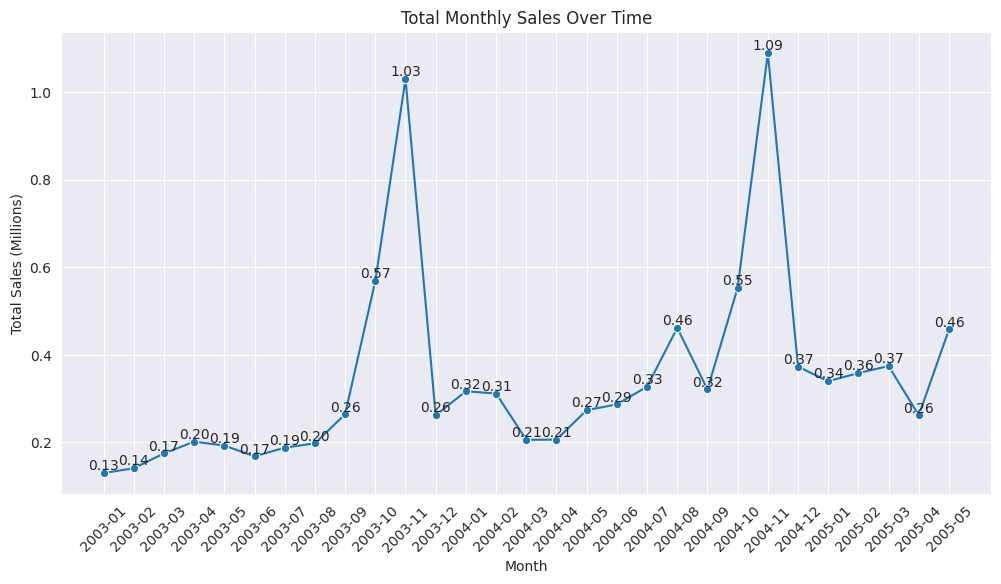

In [29]:
# Plot the data
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='SALES', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (Millions)')
plt.grid(True)

# Add text annotations for each data point
for x, y in zip(monthly_sales['YearMonth'], monthly_sales['SALES']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.show()

**ANALYSIS:**

Above clearly shows that the sales is growing especially in the months of October and November. This could be as a result of the seasonality(Black Friday sales and Thanksgiving). It is also observed that 2005 is performing better than the other years in terms of revenue having the maximum sales in all the months(Jan - May). 

# 2. Visualising the distribution of sales across different regions

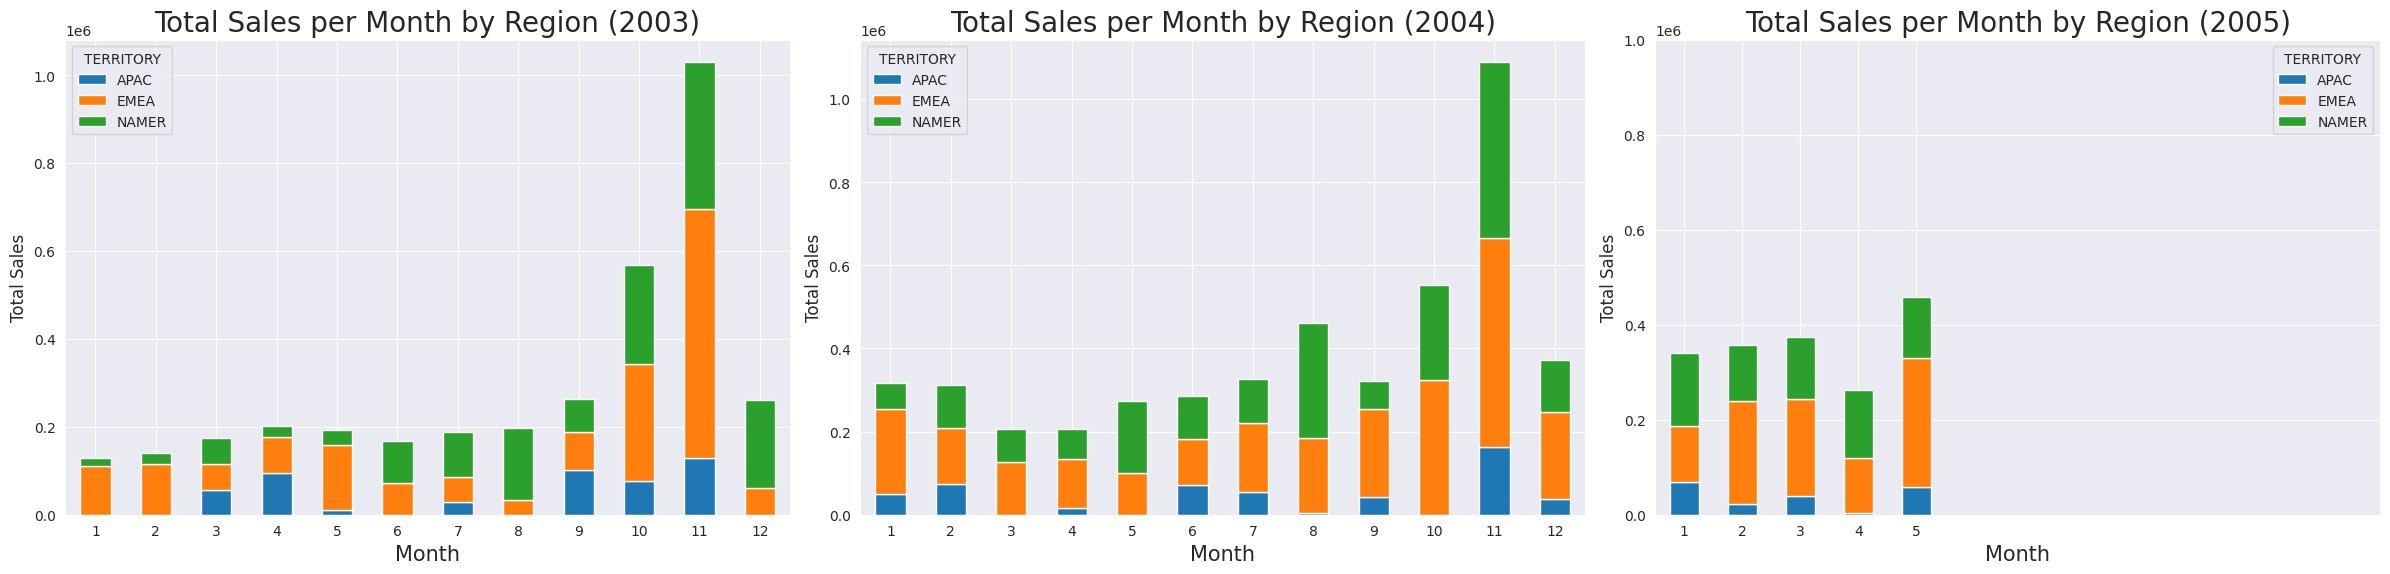

In [30]:
#fig,axes=plt.subplots(1,3) 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

pivot_2003.plot(kind='bar', figsize=(24,6), stacked=True,ax=axes[0])
axes[0].set_xlabel('Month', fontsize=15)
axes[0].set_ylabel('Total Sales', fontsize=12)
axes[0].set_title('Total Sales per Month by Region (2003)', fontsize=20)
axes[0].tick_params(axis ='x', rotation=0)

pivot_2004.plot(kind='bar', figsize=(24,6), stacked=True,ax=axes[1])
axes[1].set_xlabel('Month', fontsize=15)
axes[1].set_ylabel('Total Sales', fontsize=12)
axes[1].set_title('Total Sales per Month by Region (2004)', fontsize=20)
axes[1].tick_params(axis ='x', rotation=0)

pivot_2005.plot(kind='bar', figsize=(24,6), stacked=True,ax=axes[2])
plt.ylim(bottom=0, top=1000000)
plt.xlim(left=-0.5, right=12)
axes[2].set_xlabel('Month', fontsize=15)
axes[2].set_ylabel('Total Sales', fontsize=12)
axes[2].set_title('Total Sales per Month by Region (2005)', fontsize=20)
axes[2].tick_params(axis ='x', rotation=0)

plt.tight_layout()
plt.savefig("2003_2005.png")
plt.show()


# 3. A bar plot visualising the sales distribution across different products

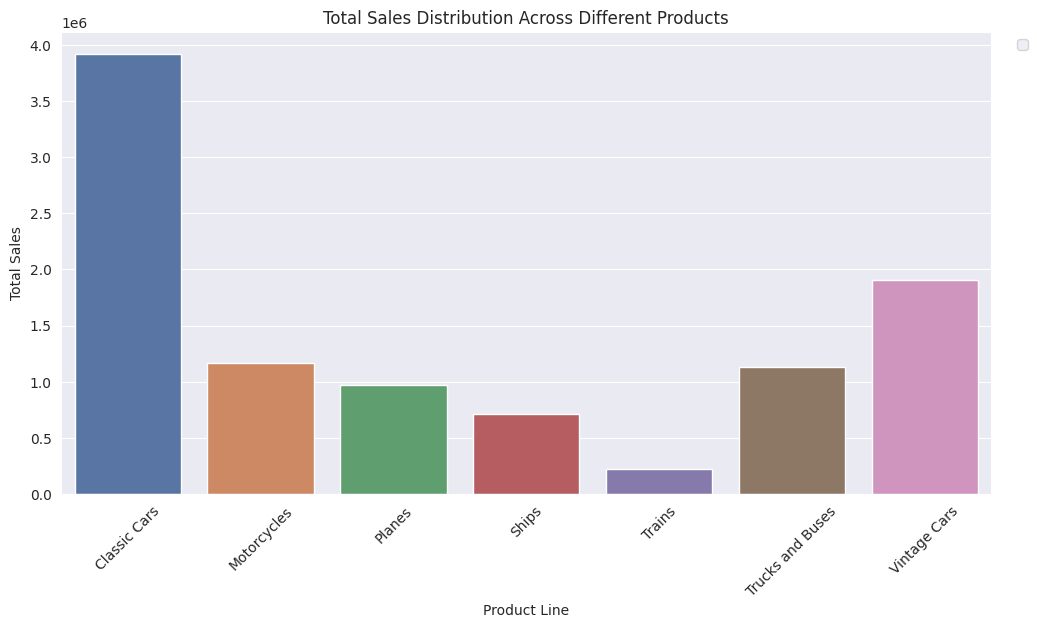

In [31]:
# Total sales data by product line
product_sales = data.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='PRODUCTLINE', y='SALES', data=product_sales, palette='deep')
plt.title('Total Sales Distribution Across Different Products')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

# 4. Scatter plot showing the relationship between sales and dealsize

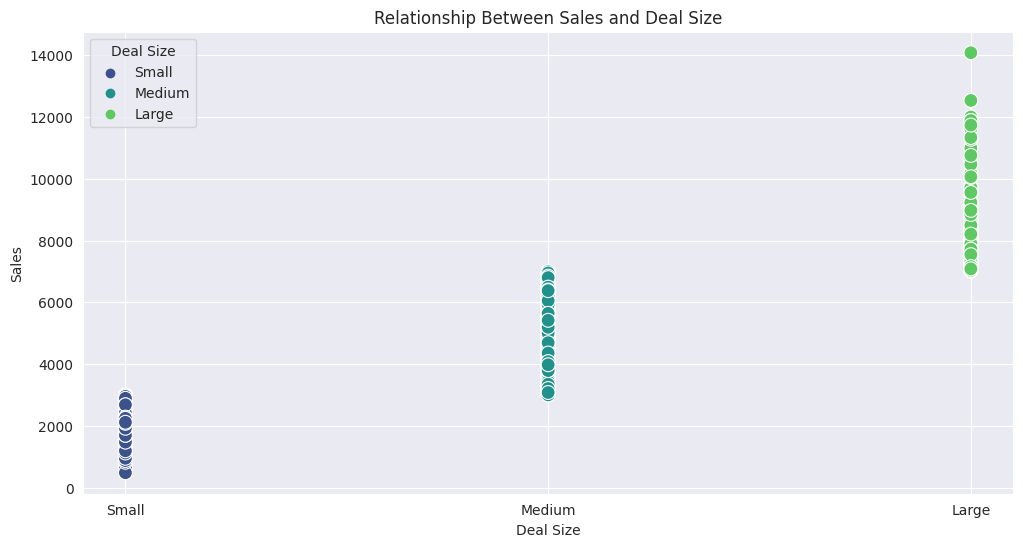

In [32]:
# Create the scatter plot
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.scatterplot(x='DEALSIZE', y='SALES', data=data, hue='DEALSIZE', palette='viridis', s=100)
plt.title('Relationship Between Sales and Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.legend(title='Deal Size')
plt.grid(True)
plt.show()

#  Data Analysis

# 1. Analysing the sales data based on different factors: product, region, and date

**By Product**

In [33]:
# Group by PRODUCTLINE and aggregate sales and quantity ordered
product_analysis = data.groupby('PRODUCTLINE').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

product_analysis

,PRODUCTLINE,SALES,QUANTITYORDERED
0,Classic Cars,3919615.66,33992
1,Motorcycles,1166388.34,11663
2,Planes,975003.57,10727
3,Ships,714437.13,8127
4,Trains,226243.47,2712
5,Trucks and Buses,1127789.84,10777
6,Vintage Cars,1903150.84,21069


**By Territory**

In [34]:
# Group by COUNTRY and aggregate sales and quantities
region_analysis = data.groupby('TERRITORY').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

region_analysis

,TERRITORY,SALES,QUANTITYORDERED
0,APAC,1201295.05,11809
1,EMEA,4979272.41,49306
2,NAMER,3852061.39,37952


**By Year**

In [35]:
# Group by YEAR_ID and aggregate sales and quantities
year_analysis = data.groupby('YEAR_ID').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

year_analysis

,YEAR_ID,SALES,QUANTITYORDERED
0,2003,3516979.54,34612
1,2004,4724162.60,46824
2,2005,1791486.71,17631


**By Quarter**

In [36]:
# Group by YEAR_ID and QTR_ID and aggregate sales and quantities
quarter_analysis = data.groupby(['YEAR_ID', 'QTR_ID']).agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

quarter_analysis

,YEAR_ID,QTR_ID,SALES,QUANTITYORDERED
0,2003,1,445094.69,4561
1,2003,2,562365.22,5659
2,2003,3,649514.54,6209
3,2003,4,1860005.09,18183
4,2004,1,833730.68,8284
5,2004,2,766260.73,7666
6,2004,3,1109396.27,10909
7,2004,4,2014774.92,19965
8,2005,1,1071992.36,10640
9,2005,2,719494.35,6991


**By Month**

In [37]:
# Group by YEAR_ID and MONTH_ID and aggregate sales and quantities
month_analysis = data.groupby(['YEAR_ID', 'MONTH_ID']).agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

month_analysis

,YEAR_ID,MONTH_ID,SALES,QUANTITYORDERED
0,2003,1,129753.60,1357
1,2003,2,140836.19,1449
2,2003,3,174504.90,1755
3,2003,4,201609.55,1993
4,2003,5,192673.11,2017
5,2003,6,168082.56,1649
6,2003,7,187731.88,1725
7,2003,8,197809.30,1974
8,2003,9,263973.36,2510
9,2003,10,568290.97,5515


# 2. Percentage of total sales contributed by each country

In [38]:
#Group by COUNTRY and aggregate sales
country_sales = data.groupby('COUNTRY')['SALES'].sum().reset_index()

#Calculate the overall total sales
total_sales = country_sales['SALES'].sum()

#Calculate the percentage of sales for each region
country_sales['PERCENTAGE'] = (country_sales['SALES'] / total_sales) * 100

country_sales

,COUNTRY,SALES,PERCENTAGE
0,Australia,630623.10,6.285721
1,Austria,202062.53,2.014054
2,Belgium,108412.62,1.080600
3,Canada,224078.56,2.233498
4,Denmark,245637.15,2.448383
5,Finland,329581.91,3.285100
6,France,1110916.52,11.073035
7,Germany,220472.09,2.197551
8,Ireland,57756.43,0.575686
9,Italy,374674.31,3.734558


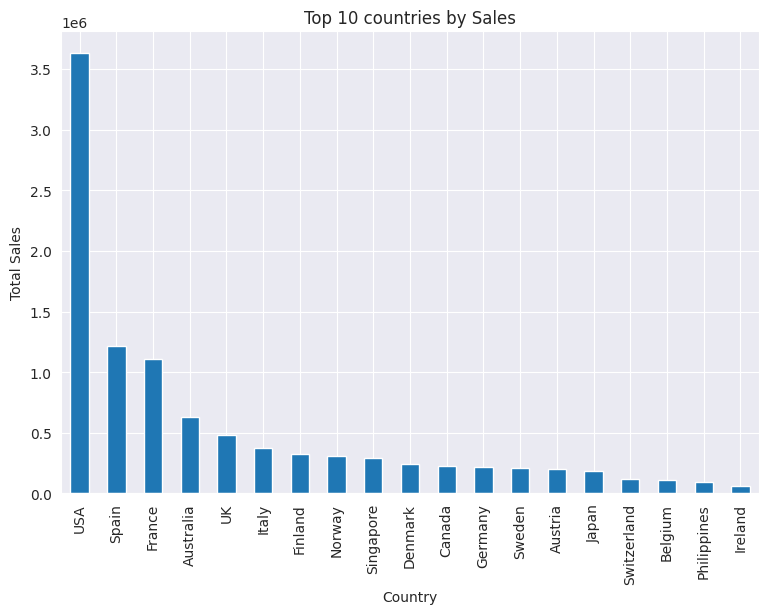

In [39]:
plt.figure(figsize=(9,6))
top_cities = data.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

# 3. The performance of different products in terms of sales

In [40]:
# Group by PRODUCTLINE and aggregate total sales and quantity sold
product_performance = data.groupby('PRODUCTLINE').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

# Calculate the average price per unit sold
product_performance['AVG_PRICE'] = product_performance['SALES'] / product_performance['QUANTITYORDERED']

# Display the product performance analysis
print("Product Performance Analysis:\n", product_performance)

Product Performance Analysis:
         PRODUCTLINE       SALES  QUANTITYORDERED   AVG_PRICE
0      Classic Cars  3919615.66            33992  115.309945
1       Motorcycles  1166388.34            11663  100.007574
2            Planes   975003.57            10727   90.892474
3             Ships   714437.13             8127   87.909085
4            Trains   226243.47             2712   83.423108
5  Trucks and Buses  1127789.84            10777  104.647846
6      Vintage Cars  1903150.84            21069   90.329434


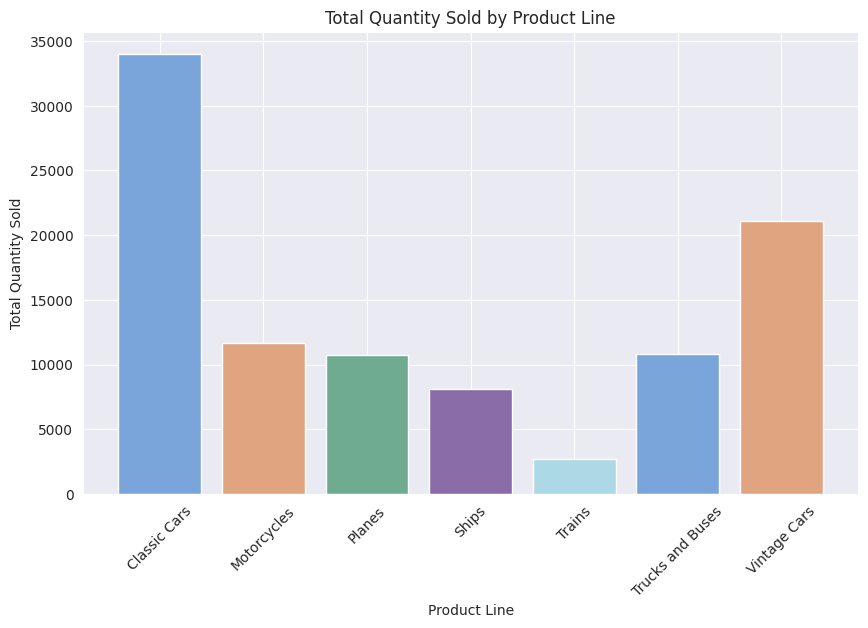

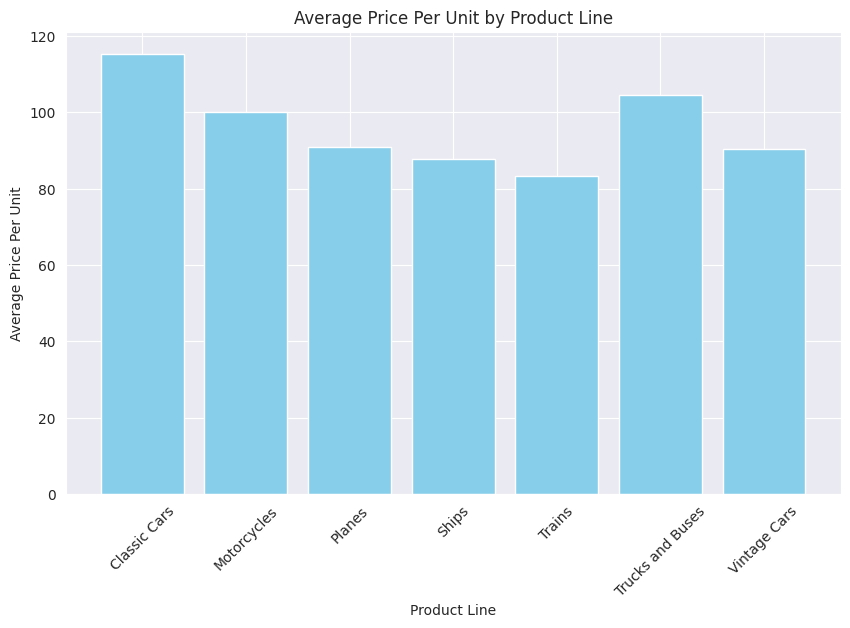

In [41]:
# Plot total quantity sold by product line
plt.figure(figsize=(10, 6))
plt.bar(product_performance['PRODUCTLINE'], product_performance['QUANTITYORDERED'], 
        color=['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6'])
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Product Line')
plt.xticks(rotation=45)
plt.show()

# Plot average price per unit by product line
plt.figure(figsize=(10, 6))
plt.bar(product_performance['PRODUCTLINE'], product_performance['AVG_PRICE'], color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Average Price Per Unit')
plt.title('Average Price Per Unit by Product Line')
plt.xticks(rotation=45)
plt.show()

# 4. Calculating the correlation between sales and dealsize

**Since the DEALSIZE has been categorised into 'Small', 'Medium', and 'Large', we will encode these categories into numerical values in order to carry out the correlation**

In [42]:
# Encode the DEALSIZE column
deal_size_mapping = {'Small': 1, 'Medium': 2, 'Large': 3}
data['DEALSIZE_NUM'] = data['DEALSIZE'].map(deal_size_mapping)

# Display the first few rows to check the encoding
print(data[['DEALSIZE', 'DEALSIZE_NUM']].head())

  DEALSIZE  DEALSIZE_NUM
0    Small             1
1    Small             1
2   Medium             2
3   Medium             2
4   Medium             2


In [43]:
# Calculate the correlation between SALES and DEALSIZE_NUM
correlation = data['SALES'].corr(data['DEALSIZE_NUM'])

print("Correlation between sales and deal size:", correlation)

Correlation between sales and deal size: 0.8628140651124394


**Analysis:** A correlation of 0.8628 indicates a strong positive relationship between Sales and Deal size. It suggests that when sales go up, the deal sizes tend to be larger.

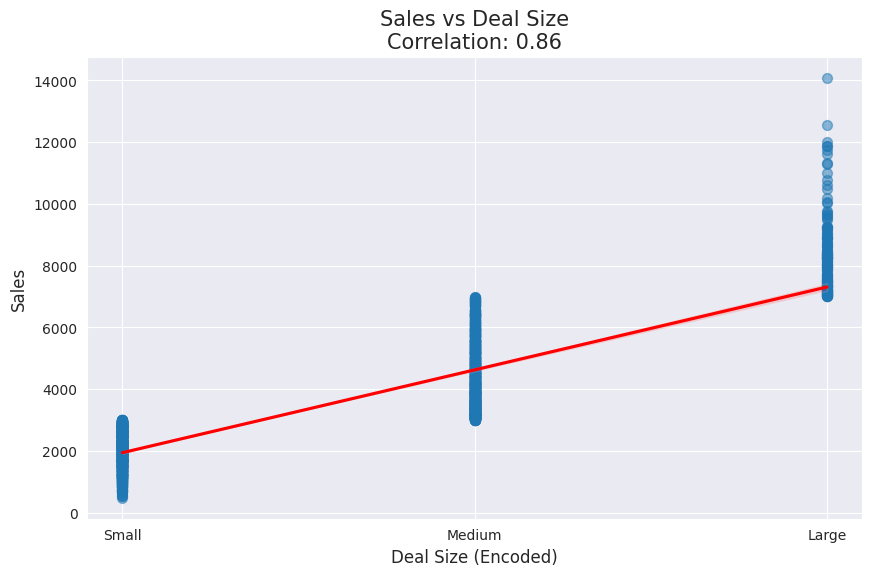

In [44]:
# Plotting using seaborn with a regression line to visualize the correlation
plt.figure(figsize=(10, 6))
sns.regplot(x='DEALSIZE_NUM', y='SALES', data=data, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})
plt.title(f'Sales vs Deal Size\nCorrelation: {correlation:.2f}', fontsize=15)
plt.xlabel('Deal Size (Encoded)', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks([1, 2, 3], ['Small', 'Medium', 'Large'])
plt.grid(True)
plt.show()

# 5. The top-performing (top 3) products in terms of sales year on year.

In [45]:
# Aggregate sales data by PRODUCTLINE and YEAR_ID
yearly_sales = data.groupby(['YEAR_ID', 'PRODUCTLINE']).agg({'SALES': 'sum'}).reset_index()

# Identify top 3 performing products year on year
top_3_products = yearly_sales.groupby('YEAR_ID').apply(lambda x: x.nlargest(3, 'SALES')).reset_index(drop=True)

# Merge top products with the original sales data to calculate total sales per year
total_sales_yearly = data.groupby('YEAR_ID')['SALES'].sum().reset_index(name='TOTAL_SALES')

print("Top 3 Performing Products by Sales Year on Year:")
print(top_3_products)


Top 3 Performing Products by Sales Year on Year:
   YEAR_ID       PRODUCTLINE       SALES
0     2003      Classic Cars  1484785.29
1     2003      Vintage Cars   650987.76
2     2003  Trucks and Buses   420429.93
3     2004      Classic Cars  1762257.09
4     2004      Vintage Cars   911423.77
5     2004       Motorcycles   560545.23
6     2005      Classic Cars   672573.28
7     2005      Vintage Cars   340739.31
8     2005       Motorcycles   234947.53


/tmp/ipykernel_18/2660662889.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_products = yearly_sales.groupby('YEAR_ID').apply(lambda x: x.nlargest(3, 'SALES')).reset_index(drop=True)


# 6. The percentage of sales contributed by the top-performing productlines

In [46]:
# Calculate the percentage of sales contributed by the top-performing products
top_products_sales = top_3_products.merge(total_sales_yearly, on='YEAR_ID')
top_products_sales['PERCENTAGE'] = (top_products_sales['SALES'] / top_products_sales['TOTAL_SALES']) * 100

# Round the percentage contribution to 2 decimal places
top_products_sales['PERCENTAGE'] = top_products_sales['PERCENTAGE'].round(2)

# Output the results
print("Top 3 Performing Products Year on Year:")
print(top_products_sales)

# Summarise the percentage contribution
percentage_contribution_summary = top_products_sales.groupby('YEAR_ID')['PERCENTAGE'].sum().reset_index()
print("\nPercentage of Sales Contributed by Top 3 Products Each Year:")
print(percentage_contribution_summary)

Top 3 Performing Products Year on Year:
   YEAR_ID       PRODUCTLINE       SALES  TOTAL_SALES  PERCENTAGE
0     2003      Classic Cars  1484785.29   3516979.54       42.22
1     2003      Vintage Cars   650987.76   3516979.54       18.51
2     2003  Trucks and Buses   420429.93   3516979.54       11.95
3     2004      Classic Cars  1762257.09   4724162.60       37.30
4     2004      Vintage Cars   911423.77   4724162.60       19.29
5     2004       Motorcycles   560545.23   4724162.60       11.87
6     2005      Classic Cars   672573.28   1791486.71       37.54
7     2005      Vintage Cars   340739.31   1791486.71       19.02
8     2005       Motorcycles   234947.53   1791486.71       13.11

Percentage of Sales Contributed by Top 3 Products Each Year:
   YEAR_ID  PERCENTAGE
0     2003       72.68
1     2004       68.46
2     2005       69.67


# 7. The performance of different regions in terms of sales and dealsize.

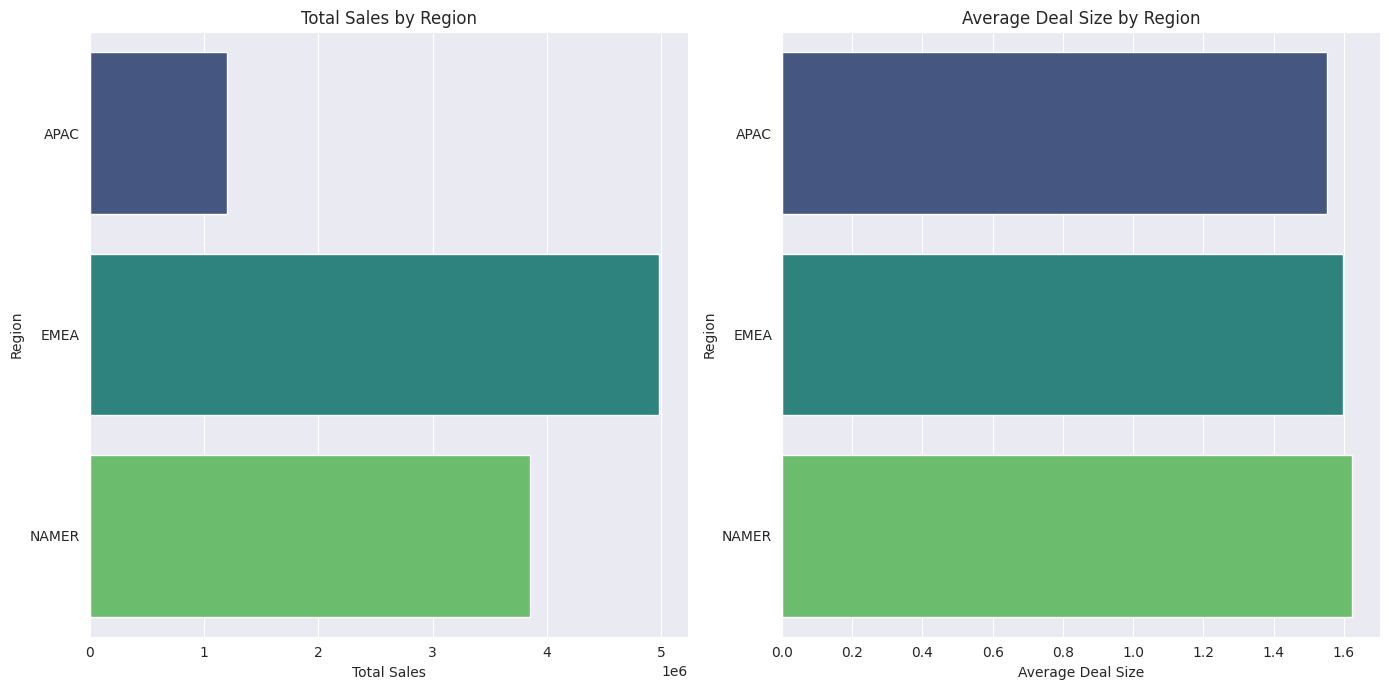

Region Performance Summary:
  TERRITORY       SALES  DEALSIZE_NUM  AVERAGE_DEALSIZE
0      APAC  1201295.05           342          1.552632
1      EMEA  4979272.41          1407          1.597726
2     NAMER  3852061.39          1074          1.621974


In [47]:
# Aggregate Sales and Deal Size Data by Region
region_performance = data.groupby('TERRITORY').agg({'SALES': 'sum', 'DEALSIZE_NUM': 'count'}).reset_index()  

# Calculate the average deal size for each region
region_performance['AVERAGE_DEALSIZE'] = data.groupby('TERRITORY')['DEALSIZE_NUM'].mean().values

# Visualize the performance of different regions
plt.figure(figsize=(14, 7))

# Plot total sales by region
plt.subplot(1, 2, 1)
sns.barplot(x='SALES', y='TERRITORY', data=region_performance, palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales')
plt.ylabel('Region')

# Plot average deal size by region
plt.subplot(1, 2, 2)
sns.barplot(x='AVERAGE_DEALSIZE', y='TERRITORY', data=region_performance, palette='viridis')
plt.title('Average Deal Size by Region')
plt.xlabel('Average Deal Size')
plt.ylabel('Region')

plt.tight_layout()
plt.show()

# Output the results
print("Region Performance Summary:")
print(region_performance)

# Insights 

# 1. Sales Trends and Product Performance

**Overall Sales Trends:**
* The sales have shown variability over the years 2003 to 2005.
* The total sales peaked in 2004 and saw a significant drop in 2005.

**Product Line Performance:**
* Classic Cars consistently dominate the sales, contributing the highest percentage each year (42.22% in 2003, 37.30% in 2004, and 37.54% in 2005).
* Vintage Cars also perform well, consistently being the second highest contributor.
* Motorcycles, Planes, Ships, and Trucks and Buses show moderate sales, with Trains performing the lowest.

**Sales Distribution by Product Line:**
* The distribution indicates that Classic Cars are the most popular product, followed by Vintage Cars.
* Average prices show that Classic Cars have the highest average sales price per unit, indicating a high-value segment.


# 2. Deal Size and Territory Analysis

**Impact of Deal Size:**
* There is a strong positive correlation (0.86) between sales and deal size, suggesting that larger deal sizes contribute significantly to higher sales.

**Regional Performance:**
* EMEA leads in sales, followed by NAMER (North America) and APAC (Asia-Pacific).
* EMEA also has the highest number of deals. However, NAMER shows the highest average deal size, indicating more significant transactions on average compared to EMEA and APAC.
* EMEA has the highest overall sales contributing approximately 50% more in sales compared to NAMER and 75% more than APAC, indicating a strong market presence.


# 3. Seasonal Sales Analysis

**Quarterly Sales Trends:**
* The highest sales are observed in the fourth quarter of each year, indicating a seasonal spike in demand, likely due to year-end purchases or holiday seasons.
* Q1 and Q2 generally have lower sales compared to Q3 and Q4.

# Potential Areas for Further Exploration

**1. Impact of Promotions:**
* Analyse how promotional activities, discounts, and marketing campaigns impact sales across different quarters and regions.
* Assess the effectiveness of past promotional strategies in boosting sales to understand if it drives higher sales volumes or larger deal sizes.

**2. Seasonality:**
* Conduct a more detailed seasonal analysis to understand the factors driving the significant increase in Q4 sales.
* Investigate if certain product lines are affected or benefit more from seasonal trends.

**3. Customer Demographics:**
* Analyse sales data by customer demographics (age, gender, income level) to identify target customer segments.
* Segment customers to tailor marketing strategies for different demographic groups.

**4. Product Line Analysis:**
* Evaluate the performance of new product lines over time.
* Identify underperforming products such as the decline in sales for Classic cars in 2005 and explore reasons for low sales, such as lack of customer interest or market saturation.



# Recommendations for Improving Sales Performance

In order to optimise sales performace and achieve sustainable growth, the following recommendations have been made:

**1. Focus on high performing Product lines:**
* Since Classic and Vintage Cars are the top performers, focus marketing efforts on these product lines as they consistently generate the highest sales.
* Consider introducing new models or limited editions to stimulate interest and sales.

**2. Targeted Promotions:**
* Leverage the Q4 sales spike by running targeted promotions and campaigns during this period.
* Since there is a strong correlation between deal size and sales, consider strategies to increase the average deal size, such as bundling products or offering incentives for bulk purchases.
* Train sales teams to upsell and cross-sell effectively.


**3. Regional Strategies:**
* Invest more in EMEA and NAMER regions to maintain and grow market share.
* Focus on increasing the number of deals to match the deal size performance in NAMER.
* Explore strategies to boost sales in APAC, which has the lowest sales among the regions by understanding local market preferences and adjusting product line offerings accordingly.

**4. Product Innovation and Expansion:**
* Conduct market research to identify gaps and opportunities for new product introductions.

**5. Customer Engagement:**
* Implement loyalty programs to retain existing customers and attract new ones.
* Use customer feedback to improve product offerings and address any issues. 

